<a href="https://colab.research.google.com/github/SarahSouzaPontes/Regressao_com_PyCaret/blob/main/Regress%C3%A3o_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#instalar pycaret
!pip install pycaret
!pip install \inja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement inja2 (from versions: none)
ERROR: No matching distribution found for inja2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is i

In [4]:
from pycaret.datasets import get_data
dados = get_data('insurance') 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


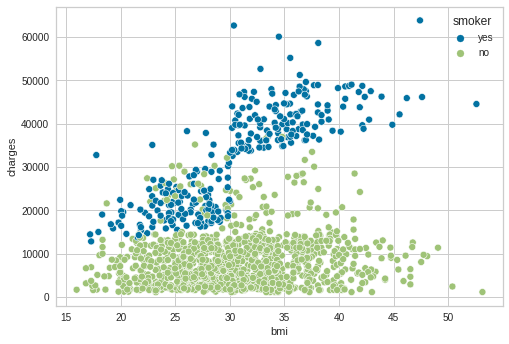

In [5]:
import seaborn as sns
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

In [6]:
#detectar fumantes e possiveis fraudadores
from pycaret.classification import setup, models, create_model, tune_model,\
                               compare_models, blend_models, stack_models, \
                               predict_model, evaluate_model, \
                               finalize_model, save_model, load_model

In [7]:
classificacao = setup(data = dados,
                      target = 'smoker',
                      normalize = True)

,Description,Value
0,session_id,4388
1,Target,smoker
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1338, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [9]:
melhores = compare_models(n_select = 3, sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9647,0.9919,0.9482,0.8921,0.9170,0.8947,0.8972,0.289
dt,Decision Tree Classifier,0.9626,0.9518,0.9334,0.8998,0.9135,0.8897,0.8922,0.037
lightgbm,Light Gradient Boosting Machine,0.9583,0.9951,0.9382,0.8789,0.9045,0.8780,0.8813,0.163
rf,Random Forest Classifier,0.9476,0.9884,0.8963,0.8646,0.8767,0.8435,0.8465,0.659
ada,Ada Boost Classifier,0.9423,0.9867,0.8913,0.8485,0.8660,0.8294,0.8324,0.252
et,Extra Trees Classifier,0.9423,0.9831,0.8453,0.8763,0.8585,0.8223,0.8240,0.605
lr,Logistic Regression,0.9402,0.9841,0.8705,0.8511,0.8585,0.8206,0.8225,0.617
svm,SVM - Linear Kernel,0.9337,0.0000,0.8539,0.8391,0.8366,0.7956,0.8029,0.034
knn,K Neighbors Classifier,0.9273,0.9727,0.7784,0.8656,0.8163,0.7713,0.7754,0.160
lda,Linear Discriminant Analysis,0.9187,0.9804,0.7774,0.8233,0.7975,0.7468,0.7489,0.029


In [10]:
lightgbm = create_model('lightgbm')
#modelo e fará a tunagem em 20 espaços parametricos

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9787,1.0000,0.8947,1.0000,0.9444,0.9313,0.9335
1,0.9681,0.9986,1.0000,0.8636,0.9268,0.9066,0.9105
2,0.9362,0.9932,0.8500,0.8500,0.8500,0.8095,0.8095
3,0.9681,0.9959,1.0000,0.8696,0.9302,0.9097,0.9134
4,0.9362,0.9878,0.9000,0.8182,0.8571,0.8162,0.8177
5,0.9574,0.9926,1.0000,0.8333,0.9091,0.8816,0.8879
6,0.9462,0.9915,0.8947,0.8500,0.8718,0.8378,0.8383
7,0.9892,1.0000,0.9474,1.0000,0.9730,0.9663,0.9668
8,0.9677,0.9957,0.8947,0.9444,0.9189,0.8988,0.8993


In [11]:
lightgbm_tunado = tune_model(lightgbm, optimize = 'Accuracy', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9574,0.9895,0.7895,1.0000,0.8824,0.8568,0.8657
1,0.9574,0.9930,0.9474,0.8571,0.9000,0.8731,0.8748
2,0.9468,0.9885,0.9000,0.8571,0.8780,0.8441,0.8445
3,0.9681,0.9946,1.0000,0.8696,0.9302,0.9097,0.9134
4,0.9468,0.9841,1.0000,0.8000,0.8889,0.8545,0.8637
5,0.9362,0.9750,0.9500,0.7917,0.8636,0.8224,0.8282
6,0.9785,0.9886,1.0000,0.9048,0.9500,0.9363,0.9382
7,0.9570,0.9872,0.8947,0.8947,0.8947,0.8677,0.8677
8,0.9677,0.9922,0.9474,0.9000,0.9231,0.9027,0.9032


In [12]:
modelo_combinado = blend_models(melhores, method = 'soft')
#medida de propensao (ordenar)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9681,0.9993,0.8421,1.0000,0.9143,0.8949,0.8998
1,0.9894,1.0000,1.0000,0.9500,0.9744,0.9677,0.9682
2,0.9468,0.9919,0.9000,0.8571,0.8780,0.8441,0.8445
3,0.9681,0.9959,1.0000,0.8696,0.9302,0.9097,0.9134
4,0.9468,0.9899,0.9000,0.8571,0.8780,0.8441,0.8445
5,0.9681,0.9953,0.9500,0.9048,0.9268,0.9064,0.9069
6,0.9462,0.9936,0.9474,0.8182,0.8780,0.8438,0.8475
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9892,0.9986,0.9474,1.0000,0.9730,0.9663,0.9668


In [13]:
modelo_stack = stack_models(melhores)
#pega o modelo e nao a media, utilizando como covariaveis, como se fizesse um modelo combinando, boa opcao mas no foi melhor que os anteriores

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9787,1.0000,0.8947,1.0000,0.9444,0.9313,0.9335
1,0.9787,0.9993,1.0000,0.9048,0.9500,0.9365,0.9384
2,0.9574,0.9872,0.9500,0.8636,0.9048,0.8774,0.8791
3,0.9681,0.9939,1.0000,0.8696,0.9302,0.9097,0.9134
4,0.9468,0.9939,0.9000,0.8571,0.8780,0.8441,0.8445
5,0.9468,0.9872,0.9500,0.8261,0.8837,0.8495,0.8529
6,0.9355,0.9886,0.8947,0.8095,0.8500,0.8090,0.8107
7,0.9677,0.9950,0.9474,0.9000,0.9231,0.9027,0.9032
8,0.9892,0.9972,0.9474,1.0000,0.9730,0.9663,0.9668


In [14]:
melhores_tunados = [tune_model(i) for i in melhores]
#tunagem dos melhores modelos, guardando na lista os 3 melhores tunados

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9574,0.9930,0.7895,1.0000,0.8824,0.8568,0.8657
1,0.9787,0.9958,0.9474,0.9474,0.9474,0.9340,0.9340
2,0.9362,0.9851,0.8500,0.8500,0.8500,0.8095,0.8095
3,0.9681,0.9926,1.0000,0.8696,0.9302,0.9097,0.9134
4,0.9574,0.9932,0.9500,0.8636,0.9048,0.8774,0.8791
5,0.9255,0.9824,0.9000,0.7826,0.8372,0.7892,0.7925
6,0.9462,0.9886,0.8947,0.8500,0.8718,0.8378,0.8383
7,0.9677,0.9872,0.9474,0.9000,0.9231,0.9027,0.9032
8,0.9677,0.9943,0.9474,0.9000,0.9231,0.9027,0.9032


In [15]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9574,0.9965,0.8421,0.9412,0.8889,0.8627,0.8647
1,0.9043,0.9789,0.7895,0.7500,0.7692,0.7089,0.7092
2,0.9468,0.9899,0.8500,0.8947,0.8718,0.8383,0.8387
3,0.9574,0.9932,0.9000,0.9000,0.9000,0.8730,0.8730
4,0.9681,0.9953,0.9000,0.9474,0.9231,0.9030,0.9034
5,0.9149,0.9608,0.9500,0.7308,0.8261,0.7710,0.7826
6,0.9570,0.9851,0.9474,0.8571,0.9000,0.8727,0.8745
7,0.9570,0.9815,0.8947,0.8947,0.8947,0.8677,0.8677
8,0.9247,0.9801,0.7895,0.8333,0.8108,0.7639,0.7643


In [16]:
lr_tunado = tune_model(lr, optimize = 'Accuracy', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9894,0.9965,1.0000,0.9500,0.9744,0.9677,0.9682
1,0.9468,0.9818,1.0000,0.7917,0.8837,0.8498,0.8596
2,0.9787,0.9878,1.0000,0.9091,0.9524,0.9387,0.9405
3,0.9468,0.9939,1.0000,0.8000,0.8889,0.8545,0.8637
4,0.9894,0.9953,1.0000,0.9524,0.9756,0.9688,0.9693
5,0.9255,0.9601,1.0000,0.7407,0.8511,0.8029,0.8189
6,0.9677,0.9858,1.0000,0.8636,0.9268,0.9063,0.9103
7,0.9677,0.9815,1.0000,0.8636,0.9268,0.9063,0.9103
8,0.9570,0.9808,1.0000,0.8261,0.9048,0.8773,0.8840


In [17]:
lr_tunado = tune_model(lr, optimize = 'Accuracy', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9894,0.9965,1.0000,0.9500,0.9744,0.9677,0.9682
1,0.9468,0.9818,1.0000,0.7917,0.8837,0.8498,0.8596
2,0.9787,0.9878,1.0000,0.9091,0.9524,0.9387,0.9405
3,0.9468,0.9939,1.0000,0.8000,0.8889,0.8545,0.8637
4,0.9894,0.9953,1.0000,0.9524,0.9756,0.9688,0.9693
5,0.9255,0.9601,1.0000,0.7407,0.8511,0.8029,0.8189
6,0.9677,0.9858,1.0000,0.8636,0.9268,0.9063,0.9103
7,0.9677,0.9815,1.0000,0.8636,0.9268,0.9063,0.9103
8,0.9570,0.9808,1.0000,0.8261,0.9048,0.8773,0.8840


In [18]:
modelo_combinado_2 = blend_models(melhores_tunados, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9574,0.9958,0.7895,1.0000,0.8824,0.8568,0.8657
1,0.9787,0.9965,1.0000,0.9048,0.9500,0.9365,0.9384
2,0.9468,0.9878,0.9000,0.8571,0.8780,0.8441,0.8445
3,0.9681,0.9946,1.0000,0.8696,0.9302,0.9097,0.9134
4,0.9468,0.9872,0.9000,0.8571,0.8780,0.8441,0.8445
5,0.9362,0.9858,0.9500,0.7917,0.8636,0.8224,0.8282
6,0.9355,0.9879,0.8947,0.8095,0.8500,0.8090,0.8107
7,0.9677,0.9922,0.9474,0.9000,0.9231,0.9027,0.9032
8,0.9677,0.9964,0.8947,0.9444,0.9189,0.8988,0.8993


In [19]:
modelo_stack_2 = stack_models(melhores_tunados)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9574,0.9986,0.7895,1.0000,0.8824,0.8568,0.8657
1,0.9681,0.9937,0.9474,0.9000,0.9231,0.9030,0.9034
2,0.9574,0.9872,0.9000,0.9000,0.9000,0.8730,0.8730
3,0.9681,0.9953,1.0000,0.8696,0.9302,0.9097,0.9134
4,0.9574,0.9946,0.9000,0.9000,0.9000,0.8730,0.8730
5,0.9149,0.9709,0.9000,0.7500,0.8182,0.7632,0.7686
6,0.9570,0.9844,0.9474,0.8571,0.9000,0.8727,0.8745
7,0.9785,0.9815,1.0000,0.9048,0.9500,0.9363,0.9382
8,0.9355,0.9865,0.8421,0.8421,0.8421,0.8016,0.8016


In [20]:
evaluate_model(lr_tunado)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
pred = predict_model(lr_tunado)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9701,0.9895,0.9875,0.8778,0.9294,0.9106,0.9131


In [22]:
pred

,age,bmi,charges,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest,smoker,Label,Score
0,0.573556,-0.139709,-0.304790,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.9987
1,-0.632526,-0.452510,-0.749970,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,0.9975
2,-0.632526,-0.490376,-0.797333,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9960
3,-0.490634,2.229351,-0.761609,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,1.0000
4,0.644502,0.596198,-0.309443,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1.141124,-1.511096,-0.209659,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9070
398,-1.341986,-0.311750,-0.886403,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,0.9974
399,-0.703472,-1.343994,-0.662924,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,0.9656
400,0.431664,0.182971,0.369861,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,0.9128
